There is a substantial number of cells within this dataset, necessitating the use of neural networks or parameter tuning. However, such approaches would demand a considerable amount of computational time. Consequently, we have made the decision to employ Support Vector Classifier (SVC), a model that has consistently demonstrated strong performance.

In [ ]:
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import random
%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
hcc =  "HCC1806_Filtered_Normalised_3000_Data_train.txt"
df_hcc = pd.read_csv(hcc, delimiter=' ', engine='python', index_col=0).T
df_hcc['Cell'] = np.zeros(df_hcc.shape[0])
df_hcc = df_hcc.T
df_hcc

,AAAAAACCCGGC_Normoxia,AAAACCGGATGC_Normoxia,AAAACGAGCTAG_Normoxia,AAAACTTCCCCG_Normoxia,AAAAGCCTACCC_Normoxia,AAACACAAATCT_Normoxia,AAACCAAGCCCA_Normoxia,AAACCATGCACT_Normoxia,AAACCTCCGGCT_Normoxia,AAACGCCGGTCC_Normoxia,...,TTTTCTGATGGT_Hypoxia,TTTTGATTCAGA_Hypoxia,TTTTGCAACTGA_Hypoxia,TTTTGCCGGGCC_Hypoxia,TTTTGTTAGCCT_Hypoxia,TTTTTACCAATC_Hypoxia,TTTTTCCGTGCA_Hypoxia,TTTTTGCCTGGG_Hypoxia,TTTTTGTAACAG_Hypoxia,TTTTTTTGAATC_Hypoxia
H1-5,2.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,3.0,1.0
MALAT1,3.0,3.0,2.0,3.0,12.0,3.0,1.0,2.0,0.0,0.0,...,3.0,1.0,1.0,1.0,4.0,0.0,4.0,1.0,3.0,6.0
MT-RNR2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0
ARVCF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BCYRN1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,3.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAS7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADAP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RFTN1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZNF837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mcf =  "MCF7_Filtered_Normalised_3000_Data_train.txt"
df_mcf = pd.read_csv(mcf, delimiter=' ', engine='python', index_col=0).T
df_mcf['Cell'] = np.ones(df_mcf.shape[0])
df_mcf = df_mcf.T
df_mcf

,AAAAACCTATCG_Normoxia,AAAACAACCCTA_Normoxia,AAAACACTCTCA_Normoxia,AAAACCAGGCAC_Normoxia,AAAACCTAGCTC_Normoxia,AAAACCTCCGGG_Normoxia,AAAACTCGTTGC_Normoxia,AAAAGAGCTCTC_Normoxia,AAAAGCTAGGCG_Normoxia,AAAATCGCATTT_Normoxia,...,TTTTACAGGATC_Hypoxia,TTTTACCACGTA_Hypoxia,TTTTATGCTACG_Hypoxia,TTTTCCAGACGC_Hypoxia,TTTTCGCGCTCG_Hypoxia,TTTTCGCGTAGA_Hypoxia,TTTTCGTCCGCT_Hypoxia,TTTTCTCCGGCT_Hypoxia,TTTTGTTCAAAG_Hypoxia,TTTTTTGTATGT_Hypoxia
MALAT1,1.0,3.0,3.0,6.0,4.0,5.0,1.0,13.0,3.0,3.0,...,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0
MT-RNR2,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEAT1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H1-5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
TFF1,4.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,2.0,3.0,8.0,0.0,0.0,3.0,4.0,2.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HES1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
MT-TM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ITM2C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LGALS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df_hcc.join(df_mcf, how='inner',lsuffix='hcc',rsuffix='mcf').T
df

,H1-5,MALAT1,MT-RNR2,BCYRN1,H1-3,H4C3,MT-TV,Cell
AAAAAACCCGGC_Normoxia,2.0,3.0,0.0,0.0,2.0,2.0,0.0,0.0
AAAACCGGATGC_Normoxia,2.0,3.0,0.0,1.0,0.0,9.0,0.0,0.0
AAAACGAGCTAG_Normoxia,5.0,2.0,0.0,1.0,3.0,7.0,0.0,0.0
AAAACTTCCCCG_Normoxia,1.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0
AAAAGCCTACCC_Normoxia,0.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
TTTTCGCGTAGA_Hypoxia,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0
TTTTCGTCCGCT_Hypoxia,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0
TTTTCTCCGGCT_Hypoxia,1.0,0.0,0.0,5.0,0.0,4.0,0.0,1.0
TTTTGTTCAAAG_Hypoxia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
common_genes = df.columns[:-1]

In [ ]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, classification_report, confusion_matrix, precision_recall_curve, average_precision_score, auc, roc_curve
from sklearn.metrics import RocCurveDisplay as RCD

def evaluation(model,x_train,y_train,x_test,y_test):
    best=clone(model)
    best.fit(x_train,y_train)
    y_pred = best.predict(x_test)

    #scores
    y_class_prob = best.predict_proba(x_test)

    acc = accuracy_score(y_test,y_pred)
    print('Accuracy score:', acc)
    lss = log_loss(y_test,y_class_prob)
    print('Log loss:', lss)
    roc_auc = roc_auc_score(y_test,y_class_prob[:,1])
    print('Roc-auc score:',roc_auc)
    f_1 = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
    print('Average f1-score:',f_1)
    print(classification_report(y_test, y_pred))

    fig,ax = plt.subplots(1,2,figsize=(18,5))

    #fpr-tpr

    RCD.from_estimator(best, x_test, y_test,ax=ax[0])
    ax[0].set_title('ROC curve')

    # confusion matrix

    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt="d",ax=ax[1])
    ax[1].set_title('Confusion Matrix')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('True')
    
    return acc,lss,roc_auc,f_1

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state=0, probability=True)

Accuracy score: 0.783739120854908
Log loss: 0.46757600080237643
Roc-auc score: 0.8550525337451471
Average f1-score: 0.7770171086297039
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74      3678
         1.0       0.83      0.80      0.82      5399

    accuracy                           0.78      9077
   macro avg       0.78      0.78      0.78      9077
weighted avg       0.79      0.78      0.78      9077



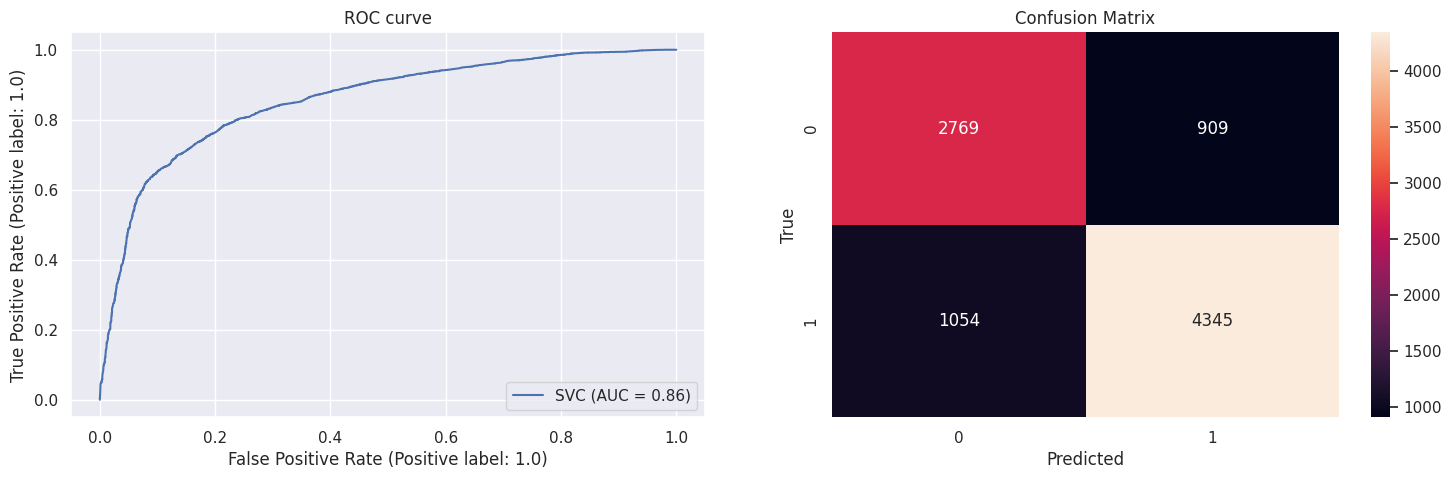

In [ ]:
svm_eval = evaluation(svm,x_train,y_train,x_test,y_test)

In [ ]:
df_unseen = pd.read_csv('XCells_Filtered_Normalised_3000_Data_test_anonim.txt',
                         delimiter=' ', engine='python', index_col=0).T
df_unseen_common = df_unseen[common_genes]

In [ ]:
svm.fit(x,y)

SVC(probability=True, random_state=0)

In [ ]:
drop_unseen_pred_type = svm.predict(df_unseen_common)
type(drop_unseen_pred_type)

numpy.ndarray

In [ ]:
drop_unseen_pred_type = np.array([('HCC1806' if drop_unseen_pred_type[i] == 0 else 'MCF7') for i in range(len(drop_unseen_pred_type))])
drop_unseen_pred_type

array(['MCF7', 'MCF7', 'MCF7', ..., 'HCC1806', 'HCC1806', 'HCC1806'],
      dtype='<U7')

In [ ]:
np.savetxt('drop_predictions_type.txt',drop_unseen_pred_type,fmt='%s')

#Results

We achieved a prediction accuracy of 67.7%. The reason why we couldn't reach a better accuracy is that we had to adopt an untrained classification model on the data since we didn't have sufficient computing power to train many machine learning algorithms on such a large dataset. Anyways, this prediction model was mainly created for experimentational purposes and to further explore our datasets.

In [3]:
%%shell
jupyter nbconvert --to html /content/Xcells_drop_report.ipynb

[NbConvertApp] Converting notebook /content/Xcells_drop_report.ipynb to html
[NbConvertApp] Writing 707843 bytes to /content/Xcells_drop_report.html
